# SMS Spam Classifier

In [95]:
import numpy as np
import pandas as pd

In [96]:
import chardet

with open("spam.csv", "rb") as f:
    result = chardet.detect(f.read())
charenc = result["encoding"]

df = pd.read_csv("spam.csv", encoding=charenc)

In [97]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
514,spam,"You are guaranteed the latest Nokia Phone, a 4...",NaN,NaN,NaN
2280,ham,R Ì_ comin back for dinner?,NaN,NaN,NaN
3463,ham,My phone,NaN,NaN,NaN
56,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...,NaN,NaN,NaN


In [98]:
df.shape

(5572, 5)

- Data Cleaning
- EDA 
- Text Preprocessing
- Model Building
- Evaluaion
- Improvement
- Website
- Deploy

## Data Cleaning

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [101]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [102]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

- ham: 0
- spam: 1

In [104]:
df.isna().sum()

target    0
text      0
dtype: int64

In [105]:
df.duplicated().sum()

403

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
df.shape

(5169, 2)

In [108]:
df.duplicated().sum()

0

# EDA

In [109]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

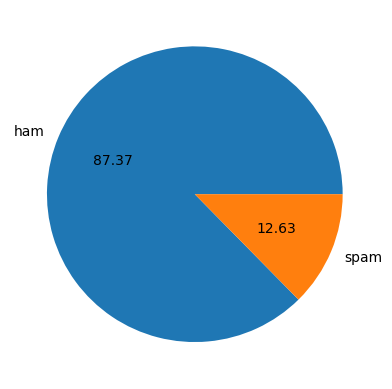

In [110]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

### Data is highly imbalanced

In [111]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lithi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
df['characters'] = df['text'].apply(len)

In [113]:
#number of words:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [114]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [115]:
df.head()

,target,text,characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [116]:
df.loc[df['target'] == 0, ['characters', 'num_words', 'num_sentences']].describe()

,characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
df.loc[df['target'] == 1, ['characters', 'num_words', 'num_sentences']].describe()

,characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [118]:
import seaborn as sns

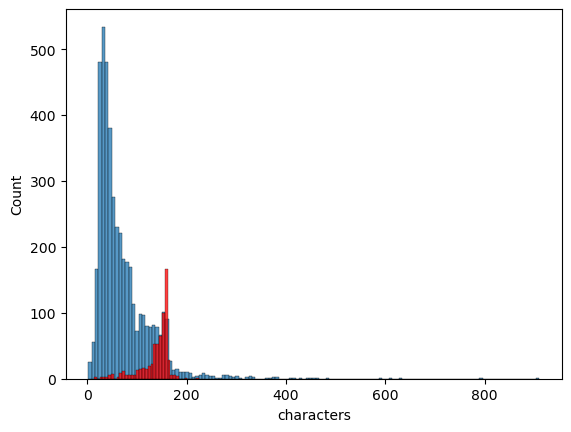

In [119]:
sns.histplot(df.loc[df['target'] == 0, 'characters'])
sns.histplot(df.loc[df['target'] == 1, 'characters'], color='red')
plt.show()

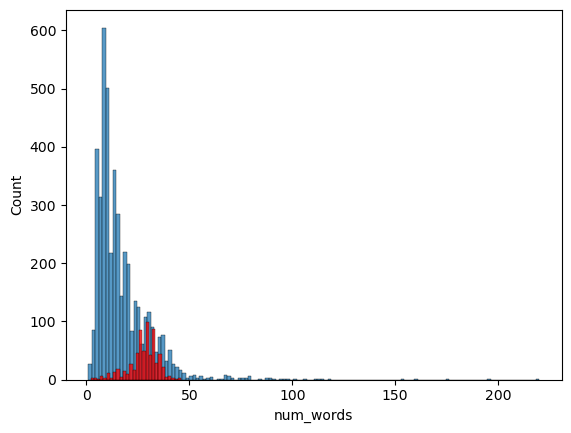

In [120]:
sns.histplot(df.loc[df['target'] == 0, 'num_words'])
sns.histplot(df.loc[df['target'] == 1, 'num_words'], color='red')
plt.show()

- ham messages have more words, spam nessages have less words

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


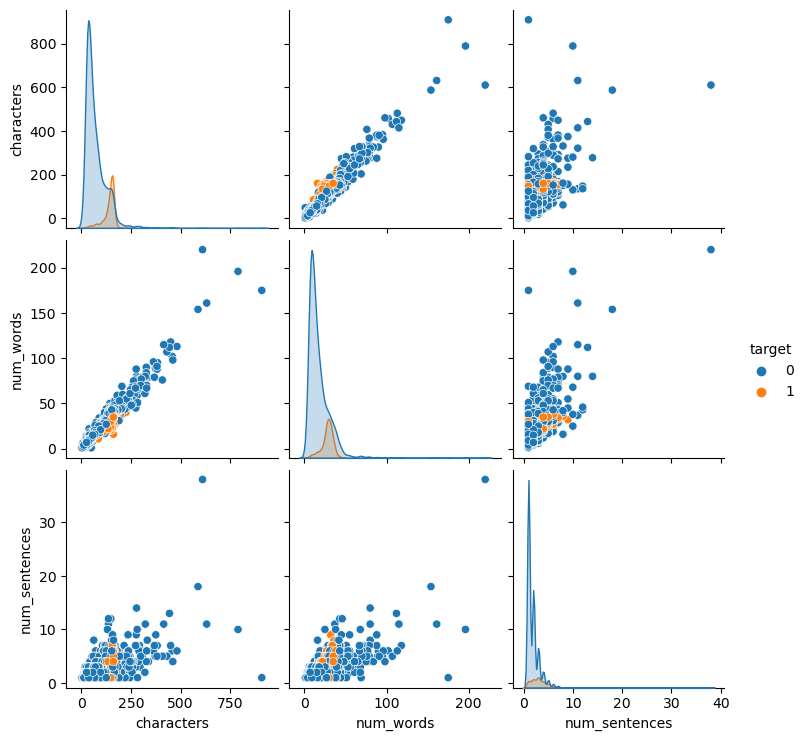

In [121]:
sns.pairplot(df, hue='target')
plt.show()

<Axes: >

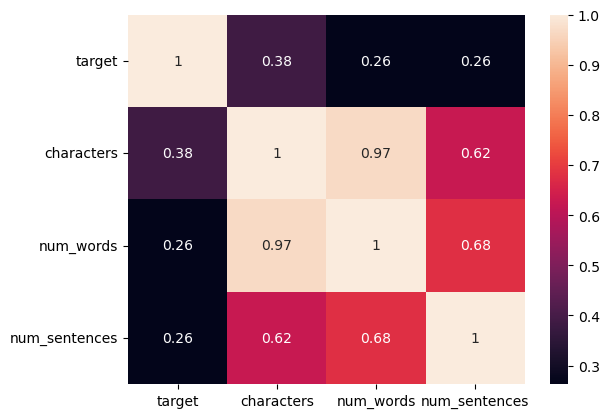

In [122]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing:
- Lower Case
- Tokenisation
- Removing Special Characters
- Removing stop words and punctuation
- Stemming

In [123]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [124]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Loving")

'love'

In [125]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return y

In [126]:
transform_text("I Loved Youtube lectures, what about u?")

['love', 'youtub', 'lectur', 'u']

In [127]:
df['transformed_text'] = df['text'].apply(transform_text)

In [128]:
from wordcloud import WordCloud

In [129]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc =spam_wc = wc.generate(' '.join(map(lambda x: ' '.join(x), df.loc[df['target'] == 1, 'transformed_text'])))

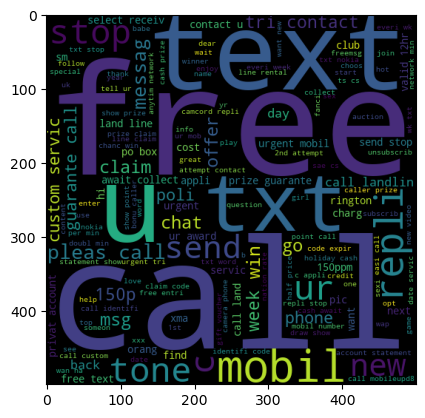

In [130]:
plt.imshow(spam_wc)

In [131]:
# texts in spam messages

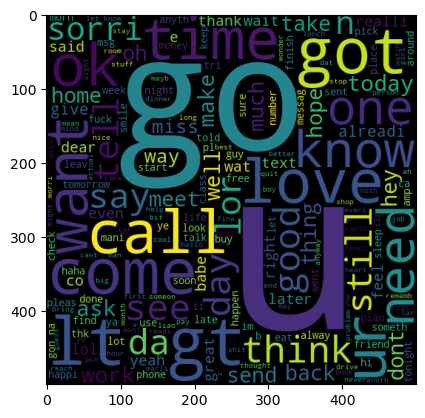

In [132]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc =spam_wc = wc.generate(' '.join(map(lambda x: ' '.join(x), df.loc[df['target'] == 0, 'transformed_text'])))
plt.imshow(spam_wc)

In [133]:
# texts in ham messages

In [134]:
spam_corpus = []
for msg in df.loc[df['target'] == 1, 'transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [135]:
len(spam_corpus)

9939

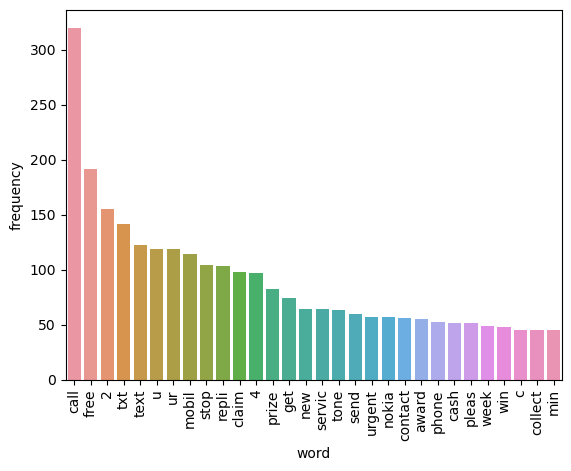

In [136]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(x = df1['word'], y = df1['frequency'])
plt.xticks(rotation = 90)
plt.show()

In [137]:
ham_corpus = []
for msg in df.loc[df['target'] == 0, 'transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [138]:
len(ham_corpus)

35404

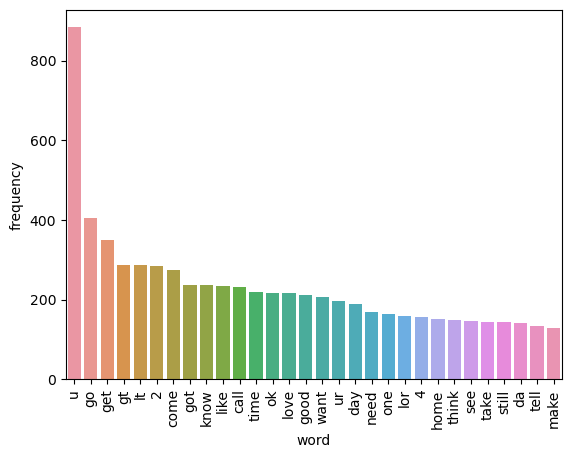

In [139]:
from collections import Counter
df1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(x = df1['word'], y = df1['frequency'])
plt.xticks(rotation = 90)
plt.show()

## Model Building

In [140]:
#vectorize the words
#input: transformed_text
#output: target
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x))).toarray()
y = df['target'].values

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [144]:
models = {
    'gnb': GaussianNB(),
    'mnb' : MultinomialNB(),
    'bnb' : BernoulliNB(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    
    print("*********************", model, "*********************")
    print("Accuracy Score: ", accuracy_score(predicted, y_test))
    print("Confusion Matrix: \n", confusion_matrix(predicted, y_test))
    print("Precision Score", precision_score(predicted, y_test), "\n")

********************* GaussianNB() *********************
Accuracy Score:  0.8800773694390716
Confusion Matrix: 
 [[792  20]
 [104 118]]
Precision Score 0.855072463768116 

********************* MultinomialNB() *********************
Accuracy Score:  0.9642166344294004
Confusion Matrix: 
 [[871  12]
 [ 25 126]]
Precision Score 0.9130434782608695 

********************* BernoulliNB() *********************
Accuracy Score:  0.9700193423597679
Confusion Matrix: 
 [[893  28]
 [  3 110]]
Precision Score 0.7971014492753623 



### MultinomialNB() is good.

In [145]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x))).toarray()
y = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
models = {
    'gnb': GaussianNB(),
    'mnb' : MultinomialNB(),
    'bnb' : BernoulliNB(),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    
    print("*********************", model, "*********************")
    print("Accuracy Score: ", accuracy_score(predicted, y_test))
    print("Confusion Matrix: \n", confusion_matrix(predicted, y_test))
    print("Precision Score", precision_score(predicted, y_test), "\n")


********************* GaussianNB() *********************
Accuracy Score:  0.8762088974854932
Confusion Matrix: 
 [[793  25]
 [103 113]]
Precision Score 0.8188405797101449 

********************* MultinomialNB() *********************
Accuracy Score:  0.9593810444874274
Confusion Matrix: 
 [[896  42]
 [  0  96]]
Precision Score 0.6956521739130435 

********************* BernoulliNB() *********************
Accuracy Score:  0.9700193423597679
Confusion Matrix: 
 [[893  28]
 [  3 110]]
Precision Score 0.7971014492753623 



### CountVectorizer → MultinomialNB : is best

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [148]:
x = cv.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x))).toarray()
y = df['target'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
models = {
    'MultinomialNB' : MultinomialNB(),
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1'),
    'SVC': SVC(kernel= 'sigmoid', gamma=1.0),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=50, random_state=2),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BaggingClassifier': BaggingClassifier(n_estimators=50, random_state=2),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGBClassifier': XGBClassifier(n_estimators=50, random_state=2)
}


In [149]:
def train_classifier(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    return accuracy, precision

In [150]:
accuracies = []
precision_scores = []

for name, model in models.items():
    curr_accuracy, curr_precision = train_classifier(model, x_train, y_train, x_test, y_test)
    
    print("*************** For: ", model, " ***************")
    print("Accuracy: ", curr_accuracy)
    print("Precision Score: ", curr_precision)
    
    accuraries.append(curr_accuracy)
    precision_scores.append(curr_precision)

*************** For:  MultinomialNB()  ***************
Accuracy:  0.9642166344294004
Precision Score:  0.8344370860927153
*************** For:  LogisticRegression(penalty='l1', solver='liblinear')  ***************
Accuracy:  0.9709864603481625
Precision Score:  0.9736842105263158
*************** For:  SVC(gamma=1.0, kernel='sigmoid')  ***************
Accuracy:  0.9264990328820116
Precision Score:  0.7421875
*************** For:  DecisionTreeClassifier()  ***************
Accuracy:  0.9584139264990329
Precision Score:  0.905982905982906
*************** For:  KNeighborsClassifier()  ***************
Accuracy:  0.9061895551257253
Precision Score:  1.0
*************** For:  RandomForestClassifier(n_estimators=50, random_state=2)  ***************
Accuracy:  0.971953578336557
Precision Score:  1.0


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


*************** For:  AdaBoostClassifier(random_state=2)  ***************
Accuracy:  0.9632495164410058
Precision Score:  0.9464285714285714
*************** For:  BaggingClassifier(n_estimators=50, random_state=2)  ***************
Accuracy:  0.9622823984526112
Precision Score:  0.9159663865546218
*************** For:  ExtraTreesClassifier(n_estimators=50, random_state=2)  ***************
Accuracy:  0.97678916827853
Precision Score:  0.9913793103448276
*************** For:  GradientBoostingClassifier(n_estimators=50, random_state=2)  ***************
Accuracy:  0.9439071566731141
Precision Score:  0.9444444444444444
*************** For:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
            

In [151]:
accuracy_values = list(map(lambda model: accuracy_score(y_test, model.predict(x_test)), models.values()))
precision_values = list(map(lambda model: precision_score(y_test, model.predict(x_test)), models.values()))

performance = pd.DataFrame({'Algorithm': models.keys(), "Accuracy" : accuracy_values, "Precision" : precision_values}).sort_values('Precision', ascending=False)

In [152]:
performance

,Algorithm,Accuracy,Precision
4,KNeighborsClassifier,0.906190,1.000000
5,RandomForestClassifier,0.971954,1.000000
8,ExtraTreesClassifier,0.976789,0.991379
1,LogisticRegression,0.970986,0.973684
10,XGBClassifier,0.973888,0.966387
6,AdaBoostClassifier,0.963250,0.946429
9,GradientBoostingClassifier,0.943907,0.944444
7,BaggingClassifier,0.962282,0.915966
3,DecisionTreeClassifier,0.958414,0.905983
0,MultinomialNB,0.964217,0.834437


In [153]:
performance.sort_values('Accuracy', ascending=False)

,Algorithm,Accuracy,Precision
8,ExtraTreesClassifier,0.976789,0.991379
10,XGBClassifier,0.973888,0.966387
5,RandomForestClassifier,0.971954,1.000000
1,LogisticRegression,0.970986,0.973684
0,MultinomialNB,0.964217,0.834437
6,AdaBoostClassifier,0.963250,0.946429
7,BaggingClassifier,0.962282,0.915966
3,DecisionTreeClassifier,0.958414,0.905983
9,GradientBoostingClassifier,0.943907,0.944444
2,SVC,0.926499,0.742188


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


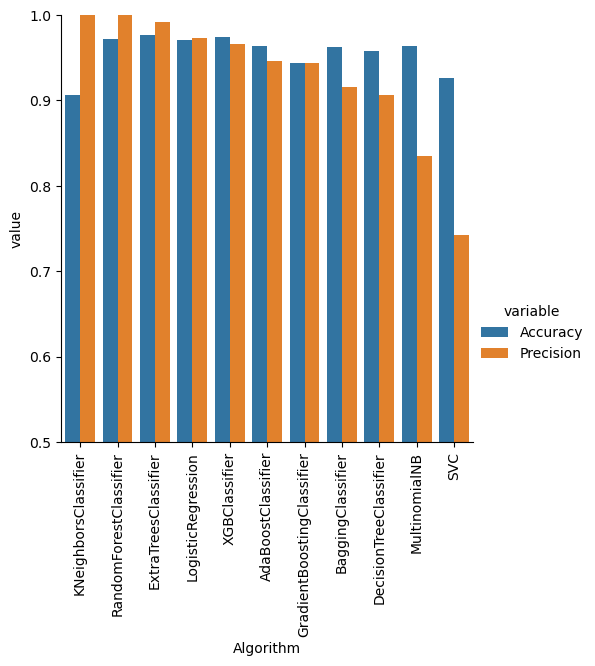

In [154]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=pd.melt(performance, id_vars = "Algorithm"), kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [155]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', models['RandomForestClassifier']),
    ('et', models['ExtraTreesClassifier'])
]

meta_model = LogisticRegression()
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

In [156]:
stacked_model.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [157]:
predict = stacked_model.predict(x_test)
print("Accuacy Score: ", accuracy_score(y_test, predict))
print("Precision Score: ", precision_score(y_test, predict))

Accuacy Score:  0.9816247582205029
Precision Score:  0.976


In [159]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))